In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing necessary header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import cm

#### Part 1: Grid based visualization of 1NN prediction

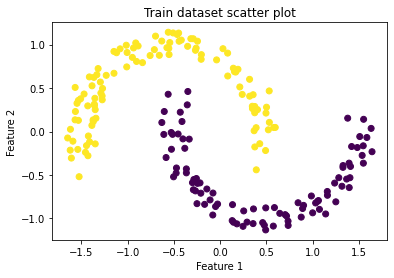

In [ ]:
#Loading the training data from D2z.txt
D2z=pd.read_csv('/content/drive/MyDrive/ECE:760/hw 3/data/D2z.txt',sep=' ',header=None)
X_train=D2z.iloc[:,0:2].values
Y_train=D2z.iloc[:,2].values

plt.title('Train dataset scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

Text(0.5, 1.0, 'Scatter plot of the grid before applying KNN')

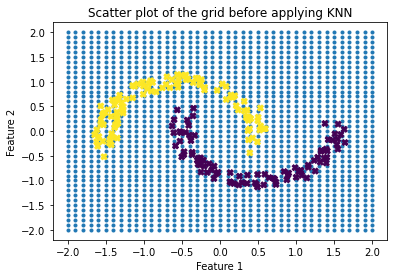

In [ ]:
#Let's define the test data now
x1=np.arange(-2,2.1,0.1)
x2=np.arange(-2,2.1,0.1)

xx, yy = np.meshgrid(x1, x2)
X_test = np.vstack((np.ravel(xx), np.ravel(yy))).T
plt.scatter(X_test[:,0],X_test[:,1],marker=".")
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,marker="X")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Scatter plot of the grid before applying KNN")

Text(0.5, 1.0, 'Scatter plot of the grid after applying KNN(K=1)')

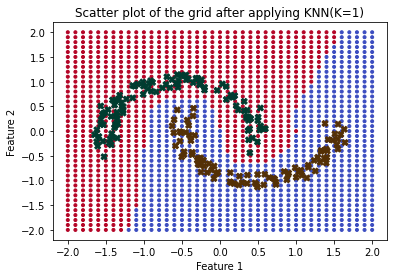

In [ ]:
#Let's build the 1NN using sklearn class
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

#The updated scatter plot
cmap_train = cm.get_cmap('BrBG', len(set(Y_train)))
cmap_test = cm.get_cmap('coolwarm', len(set(Y_pred)))
plt.scatter(X_test[:,0],X_test[:,1],marker=".",c=Y_pred, cmap=cmap_test)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,marker="X", cmap=cmap_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Scatter plot of the grid after applying KNN(K=1)")

## Spam filter

In [ ]:
#loading the emails.csv dataset

data=pd.read_csv('/content/drive/MyDrive/ECE:760/hw 3/data/emails.csv')
X=data.iloc[:,1:3001].values #Feature Space
Y=data['Prediction'].values  #Target

In [ ]:
print(f"The number of features in the data is: {X.shape[1]}")
print(f"The number of examples in the data is: {X.shape[0]}")

The number of features in the data is: 3000
The number of examples in the data is: 5000


In [ ]:
print(f"The number of spam observations in the dataset: {Y[Y==1].shape[0]}")

The number of spam observations in the dataset: 1446


#### Part 2 : 1 NN with 5-Fold cross validation

In [ ]:
from sklearn import neighbors
#Doing 5-fold cross validation of the feature space and the target using sklearn's KFold method
knn=KNeighborsClassifier(n_neighbors=1)
kf=KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold:{i}")
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  knn.fit(X_train,Y_train)
  Y_pred=knn.predict(X_test)

  print(f"The precision score is:{precision_score(Y_test,Y_pred)}")
  print(f"The recall score is:{recall_score(Y_test,Y_pred)}")
  print(f"The accuracy score is:{accuracy_score(Y_test,Y_pred)}")

Fold:0
The precision score is:0.6544943820224719
The recall score is:0.8175438596491228
The accuracy score is:0.825
Fold:1
The precision score is:0.6857142857142857
The recall score is:0.8664259927797834
The accuracy score is:0.853
Fold:2
The precision score is:0.7212121212121212
The recall score is:0.8380281690140845
The accuracy score is:0.862
Fold:3
The precision score is:0.7164179104477612
The recall score is:0.8163265306122449
The accuracy score is:0.851
Fold:4
The precision score is:0.6057441253263708
The recall score is:0.7581699346405228
The accuracy score is:0.775


#### Part-3: :Logistic Regression from scratch 

In [ ]:
#Helper functions, the activation, sigmoid and the cross entropy

def sigmoid(z):
  """
    Returns the sigmoid activation values of a Numpy array.

    Args:
    z : A Numpy array of values.

    Returns:
    A Numpy array of sigmoid activation values of z.

  """
  return (1/(1+np.exp(-z))).astype(np.float128)


def cross_entropy_loss(y_true,y_prob):
  """
    Returns the cross entropy loss for a given set of probabilities and true value

    Args:
    y_true : A numpy array of the true labels
    y_prob : A numpy array of the probabilities 

    Returns:
    A scalar indicating the cross_entropy_loss
  """

  return -np.mean((y_true*np.log(y_prob+1e-12)+(1-y_true)*np.log(1-y_prob+1e-12)))



In [ ]:
#Random testing to see if the function works
z=np.array([0,2,4])
sigmoid(z).dtype

dtype('float128')

In [ ]:
y_true=np.array([1,1,0,0])
y_pred=np.array([0.5,0.7,0.8,0.1])

cross_entropy_loss(y_true,y_pred)

2.7646205525906047

In [ ]:
#Logistic Regression Model
class LogisticRegressionModelFromScratch():
    def __init__(self, max_iter=1000, learning_rate=0.01, weight_init_min=None, weight_init_max=None):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weight_init_min = weight_init_min
        self.weight_init_max = weight_init_max

    def train_model(self, X_train, Y_train):
        self._n_features, self._n_examples = X_train.shape[1], X_train.shape[0]
        if self.weight_init_max is None or self.weight_init_min is None:
            theta = np.random.uniform(low=-0.01, high=0.01, size=self._n_features+1).astype(np.float64)
        else:
            theta = np.random.uniform(low=self.weight_init_min, high=self.weight_init_max, size=self._n_features+1).astype(np.float64)

        self.best_theta = theta  # In order to use the weights that gave the least loss for prediction
        loss = np.inf
        best_loss = np.inf
        self.loss_values = {}

        for i in range(self.max_iter):

            # Forward pass
            one_array = np.ones((self._n_examples, 1), dtype=np.float64)
            X_train_app = np.hstack((one_array, X_train.astype(np.float64)))
            Y_hat = sigmoid(np.dot(X_train_app, theta))
            # Backward pass
            grad = 1/self._n_examples * np.dot(X_train_app.T, Y_hat-Y_train)
            theta -= self.learning_rate*grad

            # Loss computation
            loss = cross_entropy_loss(Y_train, Y_hat)
            print(f"Epoch:{i+1} Loss:{loss}")
            self.loss_values[i+1] = loss  # adding losses to dictionary in case we want to plot a loss curve

            if loss < best_loss:  # using best loss as a criterion for best model to be used for prediction
                best_loss = loss
                self.best_theta = theta

    def predict(self,X_test): 
      one_array = np.ones((X_test.shape[0], 1), dtype=np.float64)
      X_test_app = np.hstack((one_array, X_test.astype(np.float64)))
      Y_sigmoid=sigmoid(np.dot(X_test_app, self.best_theta)).tolist()
      Y_pred=np.array([0 if k < 0.5 else 1 for k in Y_sigmoid])

      return Y_pred

      

In [ ]:
#5-Fold Validation
kf=KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold:{i}")
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  logreg=LogisticRegressionModelFromScratch(1000,0.005)
  logreg.train_model(X_train,Y_train)
  Y_pred=logreg.predict(X_test)

  print(f"The precision score is:{precision_score(Y_test,Y_pred)}")
  print(f"The recall score is:{recall_score(Y_test,Y_pred)}")
  print(f"The accuracy score is:{accuracy_score(Y_test,Y_pred)}")


#### Part -4 : Avg accuracy vs K graph for K=1,3,5,7,10 using 5-Fold Cross Validation

In [ ]:
#Running 5-Fold cross validatiob based KNN for K=1,3,5,7,10 and getting the average accuracy values in a list that can be used for plotting
accuracy_avg=[]
for k in [1,3,5,7,10]:
  knn=KNeighborsClassifier(n_neighbors=k)
  kf=KFold(n_splits=5)
  fold_level_accuracy=[]
  for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    fold_level_accuracy.append(accuracy_score(Y_test,Y_pred))

  print(f"The average accuracy for K={k} is: {np.mean(fold_level_accuracy)}")
  accuracy_avg.append(np.mean(fold_level_accuracy))

The average accuracy for K=1 is: 0.8332
The average accuracy for K=3 is: 0.8422000000000001
The average accuracy for K=5 is: 0.8408
The average accuracy for K=7 is: 0.8462
The average accuracy for K=10 is: 0.8556000000000001


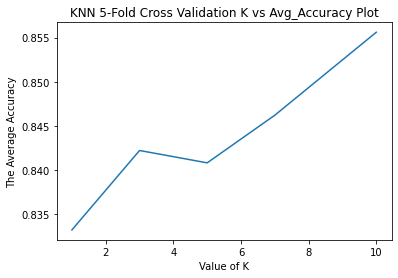

In [ ]:
#plotting K vs Avg accuracy
plt.plot([1,3,5,7,10],accuracy_avg)
plt.xlabel('Value of K')
plt.ylabel('The Average Accuracy')
plt.title('KNN 5-Fold Cross Validation K vs Avg_Accuracy Plot')
plt.show()

#### Part 5: ROC Curve for Logistic Regression and kNN

In [ ]:
#Splitting the data into train and test
X_train,X_test=X[:4000],X[4000:]
Y_train,Y_test=Y[:4000],Y[4000:]

#Training the KNN with K=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred_KNN=knn.predict(X_test)
Y_prob_KNN=knn.predict_proba(X_test)

#Training the Logistic Regression model
logreg=LogisticRegression(max_iter=20000,penalty='none') #Training without L2-Regularization
logreg.fit(X_train,Y_train)
Y_pred_LoR=logreg.predict(X_test)
Y_prob_LoR=logreg.predict_proba(X_test)

In [ ]:
#Modified the algorithm used in Question 1 (Part 5) to return Fpr and Tpr coordinates instead

def generate_roc_curve(y_true, y_score):
    # Sort the test-set instances according to predicted confidence
    sorted_indices = np.argsort(y_score)[::-1]
    y_true_sorted = y_true[sorted_indices]
    
    # Find the number of positive and negative instances in the test set
    num_neg = (y_true_sorted == 0).sum()
    num_pos = (y_true_sorted == 1).sum()
    
    # Initialize variables
    TP = 0
    FP = 0
    last_TP = 0
    fpr_coordinates = [0]
    tpr_coordinates = [0]
    # Loop over the test set instances
    for i in range(len(y_score)):
        # Find thresholds where there is a pos instance on high side, neg instance on low side
        if i > 0 and y_score[sorted_indices[i]] != y_score[sorted_indices[i-1]] and y_true_sorted[i] == 0 and TP > last_TP:
            FPR = FP / num_neg
            TPR = TP / num_pos
            fpr_coordinates.append(FPR)
            tpr_coordinates.append(TPR)
            last_TP = TP
        if y_true_sorted[i] == 1:
            TP += 1
        else:
            FP += 1
    
    # Add the last point to the ROC curve
    FPR = FP / num_neg
    TPR = TP / num_pos
    fpr_coordinates.append(FPR)
    tpr_coordinates.append(TPR)

    return fpr_coordinates, tpr_coordinates

In [ ]:
#Getting the coordinates for KNN and Logistic Regression ROC curves
knn_fpr,knn_tpr=generate_roc_curve(Y_test,Y_prob_KNN[:,1]) #sending the probabilities of class-1(Spam prediction)
logreg_fpr,logreg_tpr=generate_roc_curve(Y_test,Y_prob_LoR[:,1])

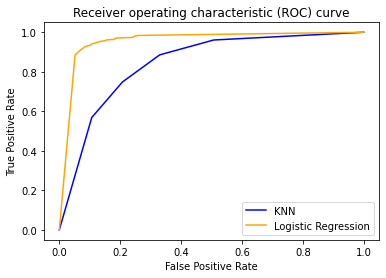

In [ ]:
#plotting the combined ROC curve
plt.plot(knn_fpr, knn_tpr, label='KNN',color='blue')
plt.plot(logreg_fpr,logreg_tpr,label='Logistic Regression',color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
